https://subscription.packtpub.com/book/data/9781789537147/1/ch01lvl1sec03/transforming-color-space-rgb-and-x2192-lab

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.utils.data as data

from skimage import  color
from torchvision import transforms, utils
from PIL import Image, ImageOps
from python.utils.images import tensor_to_pil

from python.data.dataset import *

In [2]:
def show_images(img):
    plt.imshow(transforms.functional.to_pil_image(img))
    plt.show()

# Test loader

## L\*a*b

In [3]:
my_dataset = CocoLab('data/Coco', size=256, train=False)
my_loader = data.DataLoader(my_dataset, batch_size=4, shuffle=True, num_workers=1)
L, ab = next(iter(my_loader))

In [5]:
ab[0]

tensor([[[[  7.8051,   9.7235,   9.5223,  ...,   7.4067,   7.1905,   5.4792],
          [ 11.1180,  11.5289,  11.5703,  ...,  12.0850,  10.1923,   8.6513],
          [ 11.2935,  12.7376,  12.4699,  ...,  15.1818,   6.3174,   4.7784],
          ...,
          [ -0.5809,  -0.5809,  -0.5806,  ...,  -0.3798,   0.3689,   0.3649],
          [ -0.5806,  -0.5809,  -0.5809,  ...,   1.8340,   2.0963,   1.1962],
          [ -0.5806,  -0.5809,  -0.5812,  ...,   2.6421,   3.9108,   1.2516]],

         [[ 13.5580,  13.9486,  17.0906,  ...,  12.9785,  13.5176,  11.5097],
          [ 19.0572,  19.1958,  21.0143,  ...,  18.0947,  20.0808,  18.9981],
          [ 27.7113,  27.0449,  26.7786,  ...,  33.4721,  34.2729,  33.2755],
          ...,
          [ -3.6012,  -3.6012,  -3.5978,  ...,   1.0335,   1.1899,   0.1292],
          [ -3.5978,  -3.6012,  -3.6012,  ...,  -1.3104,   0.1696,  -0.8546],
          [ -3.5978,  -3.6012,  -3.6047,  ...,   0.3347,   1.3786,   1.6083]]],


        [[[ -1.7665,  -0.661

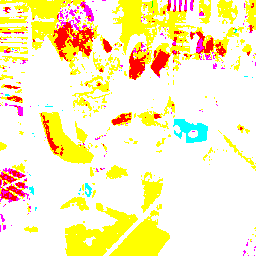

In [4]:
# color
Lab = torch.concat((L, ab), 1)
tensor_to_pil(Lab)[0]

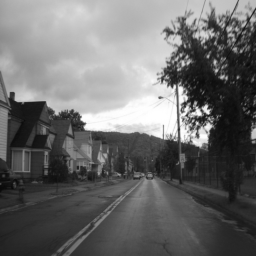

In [15]:
# grayscale
ab *= 0
Lab = torch.concat((L, ab), 1)
tensor_to_pil(Lab)[0]

## RGB

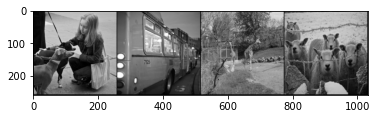

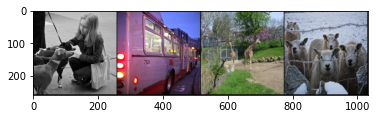

In [17]:
my_dataset = CocoGrayscaleRGB('data/Coco', size=256, train=False)
my_loader = data.DataLoader(my_dataset, batch_size=4, shuffle=True, num_workers=2)
im, target = next(iter(my_loader))

show_images(utils.make_grid(im))
show_images(utils.make_grid(target))

# Using LAB instead of grayscale

In [3]:
# Importing Image and ImageOps module from PIL package
from PIL import Image, ImageOps

im = Image.open("data/Coco/val2017/000000000139.jpg")
grey_scale = ImageOps.grayscale(im)
rgb = grey_scale.convert('RGB')
arr_rgb = np.array(rgb)

In [4]:
lab_im = color.rgb2lab(rgb)
lab_im[:,:, 1:3] = 0

In [5]:
lab_im

array([[[57.86416415,  0.        ,  0.        ],
        [59.78871024,  0.        ,  0.        ],
        [60.55510313,  0.        ,  0.        ],
        ...,
        [29.72468203,  0.        ,  0.        ],
        [29.28881784,  0.        ,  0.        ],
        [28.4139203 ,  0.        ,  0.        ]],

       [[59.40478723,  0.        ,  0.        ],
        [60.93758028,  0.        ,  0.        ],
        [61.31958267,  0.        ,  0.        ],
        ...,
        [29.72468203,  0.        ,  0.        ],
        [31.02611513,  0.        ,  0.        ],
        [29.72468203,  0.        ,  0.        ]],

       [[60.55510313,  0.        ,  0.        ],
        [61.31958267,  0.        ,  0.        ],
        [61.70111381,  0.        ,  0.        ],
        ...,
        [30.15950997,  0.        ,  0.        ],
        [29.72468203,  0.        ,  0.        ],
        [29.72468203,  0.        ,  0.        ]],

       ...,

       [[75.14859596,  0.        ,  0.        ],
        [72

In [26]:
arr_lab = np.around((color.lab2rgb(lab_im) * 255)).astype("uint8")

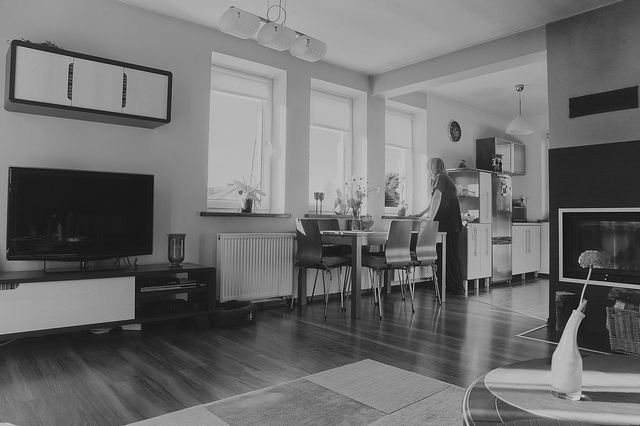

In [27]:
Image.fromarray(arr_lab)

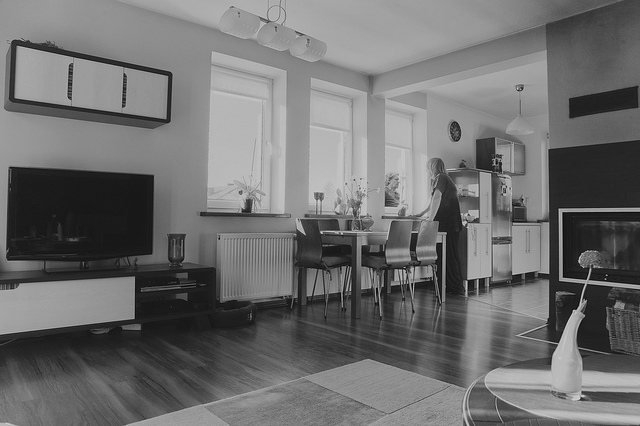

In [28]:
grey_scale

In [29]:
np.sum(np.abs(arr_rgb - arr_lab))

0